In [1]:
import qtcodes as qtc

In [5]:
from qtcodes import TopologicalRegister, TopologicalCircuit, REPETITION, XXZZ, XZZX
from qiskit import execute, Aer, QuantumCircuit, QuantumRegister

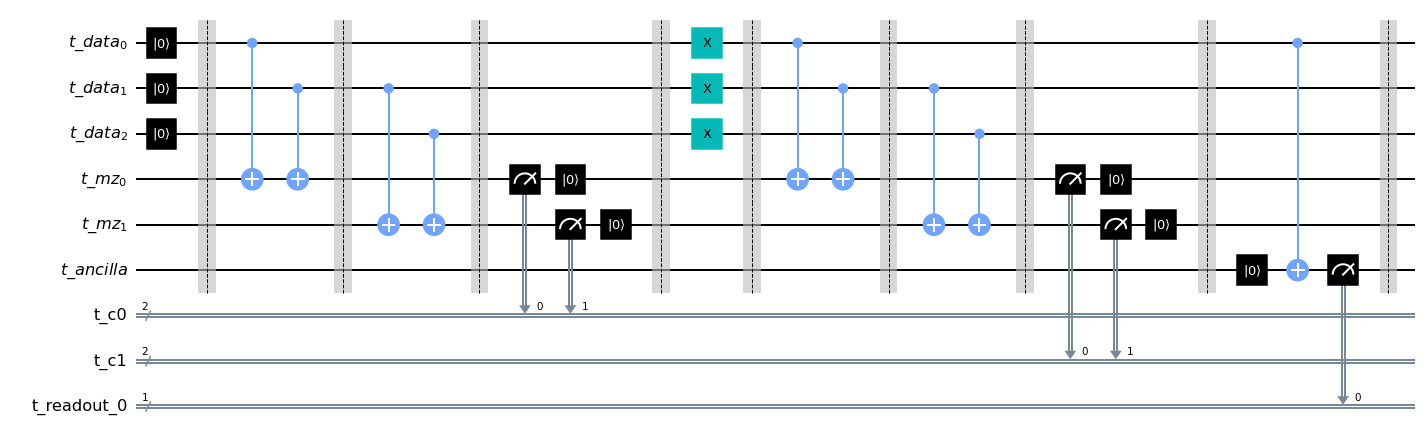

In [6]:
from qtcodes import RepetitionQubit
qubit = RepetitionQubit({"d":3},"t")
qubit.reset_z()
qubit.stabilize()
qubit.x()
qubit.stabilize()
qubit.readout_z()
qubit.draw(output='mpl', fold=150)

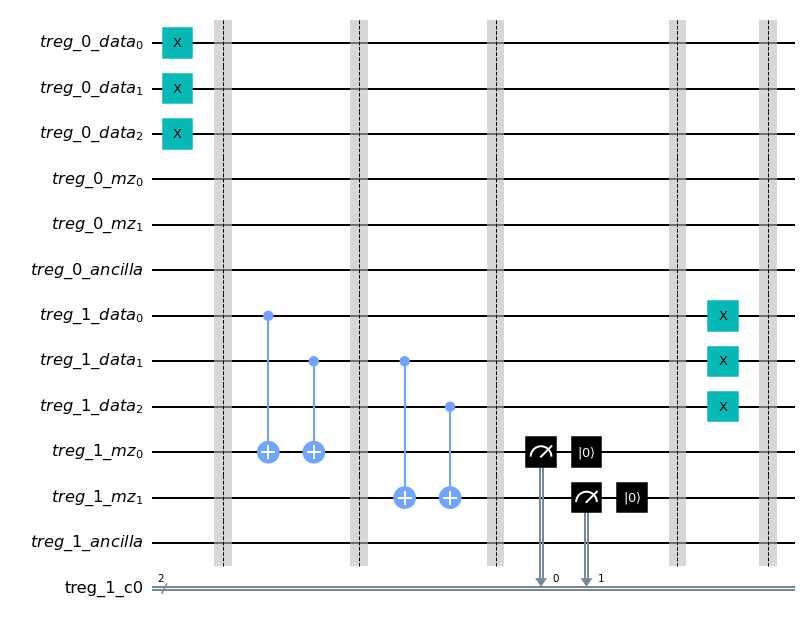

In [7]:
from qtcodes import TopologicalRegister, TopologicalCircuit
treg = TopologicalRegister(ctypes=[REPETITION, REPETITION], params=[{"d": 3}, {"d": 3}])
circ = TopologicalCircuit(treg)
circ.x(treg[0])
circ.stabilize(treg[1])
circ.x(1)
circ.draw(output='mpl', fold=500)

(<Figure size 763.675x509.117 with 1 Axes>, <AxesSubplot:>)

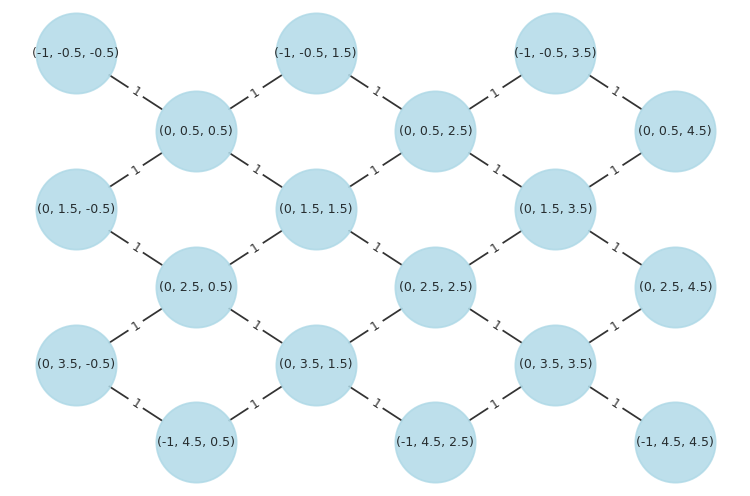

In [35]:
from qtcodes import RotatedDecoder
decoder = RotatedDecoder({"d":5,"T":1})
G = decoder.S['Z']
decoder.draw(G)


(<Figure size 763.675x509.117 with 1 Axes>, <AxesSubplot:>)

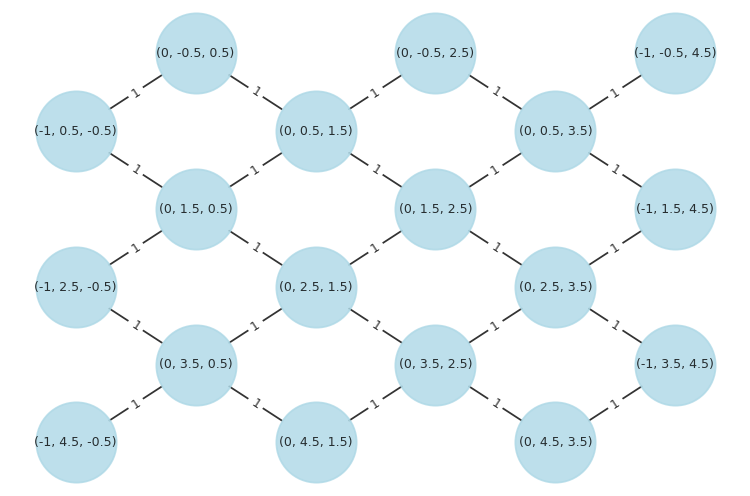

In [17]:
G = decoder.S['X']
decoder.draw(G)

X Syndrome Graph to correct X Flips
Error Graph
Matched Graph
Matches: [((0, 1.5, 0.5), (0, 0.5, 1.5))]

===

Z Syndrome Graph to correct Z Flips
Error Graph
Matched Graph
Matches: [((0, 0.5, 0.5), (0, 1.5, 1.5)), ((0, 1.5, 3.5), (0, 3.5, 3.5))]

===



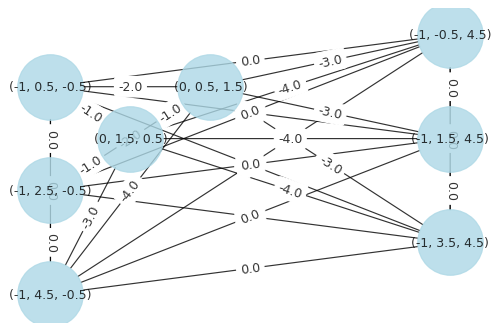

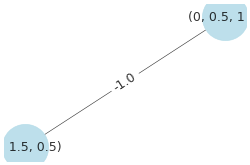

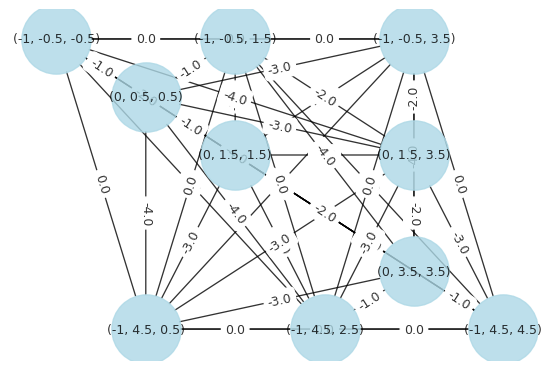

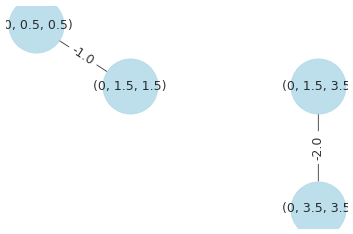

In [18]:
all_syndromes = {"X": [(0,1.5,.5),(0,.5,1.5)], "Z": [(0,0.5,0.5),(0,1.5,1.5),(0,1.5,3.5), (0,3.5,3.5)]}
matches = {}

for syndrome_key, syndromes in all_syndromes.items():
    print(f"{syndrome_key} Syndrome Graph to correct {syndrome_key} Flips")
    error_graph = decoder._make_error_graph(syndromes,syndrome_key)
    print("Error Graph")
    decoder.draw(error_graph)
    matches[syndrome_key] = decoder._run_mwpm(error_graph)
    matched_graph = decoder._run_mwpm_graph(error_graph)
    print("Matched Graph")
    decoder.draw(matched_graph)
    print(f"Matches: {matches[syndrome_key]}")
    print("\n===\n")

X Syndrome Graph to correct X Flips
Error Graph
Matched Graph
Matches: [((0, 1.5, 0.5), (0, 0.5, 1.5))]

===

Z Syndrome Graph to correct Z Flips
Error Graph
Matched Graph
Matches: [((0, 1.5, 3.5), (0, 3.5, 3.5)), ((0, 1.5, 1.5), (0, 0.5, 0.5))]

===



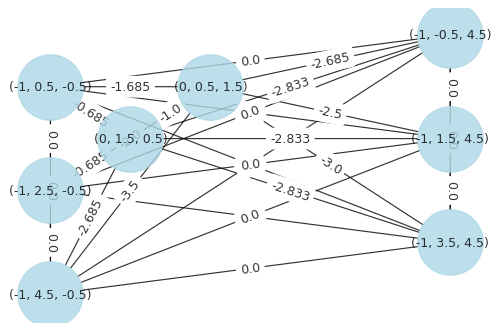

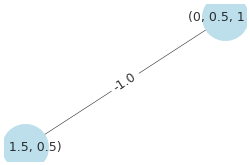

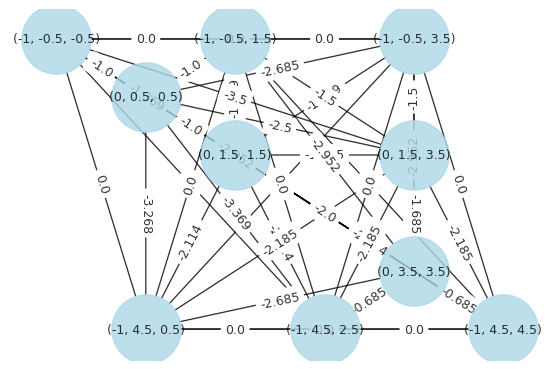

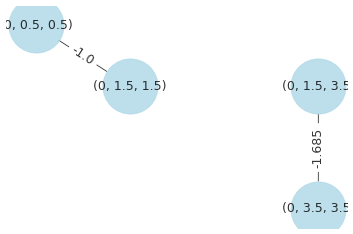

In [20]:
decoder = RotatedDecoder({"d":5,"T":1})
p = 0.1
    
all_syndromes = {"X": [(0,1.5,.5),(0,.5,1.5)], "Z": [(0,0.5,0.5),(0,1.5,1.5),(0,1.5,3.5), (0,3.5,3.5)]}
matches = {}

for syndrome_key, syndromes in all_syndromes.items():
    print(f"{syndrome_key} Syndrome Graph to correct {syndrome_key} Flips")
    error_graph = decoder._make_error_graph(syndromes,syndrome_key, err_prob=p)
    print("Error Graph")
    decoder.draw(error_graph)
    matches[syndrome_key] = decoder._run_mwpm(error_graph, floats=True)
    matched_graph = decoder._run_mwpm_graph(error_graph, floats=True)
    print("Matched Graph")
    decoder.draw(matched_graph)
    print(f"Matches: {matches[syndrome_key]}")
    print("\n===\n")

X Syndrome Graph to correct X Flips
Error Graph
Matched Graph
Matches: []

===

Z Syndrome Graph to correct Z Flips
Error Graph
Matched Graph
Matches: [((0, 0.5, 0.5), (0, 0.5, 2.5)), ((0, 6.5, 6.5), (-1, 8.5, 4.5)), ((0, 4.5, 4.5), (0, 2.5, 4.5))]

===



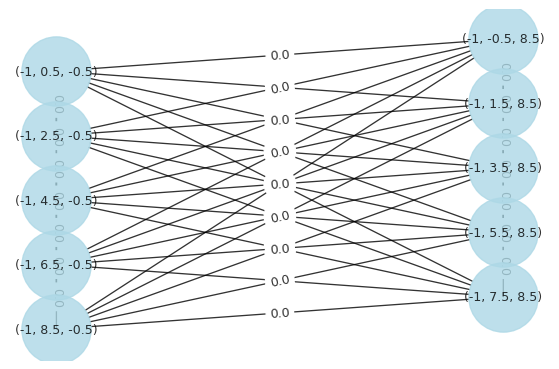

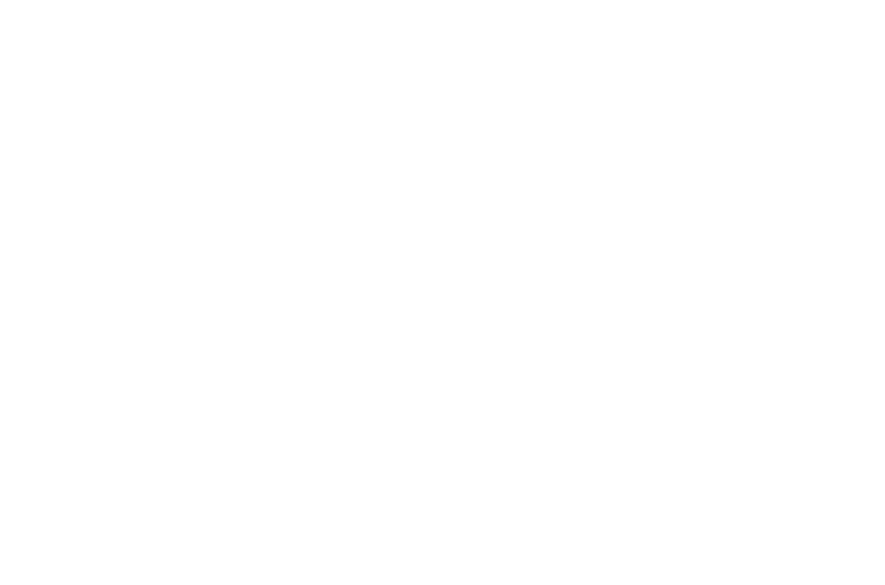

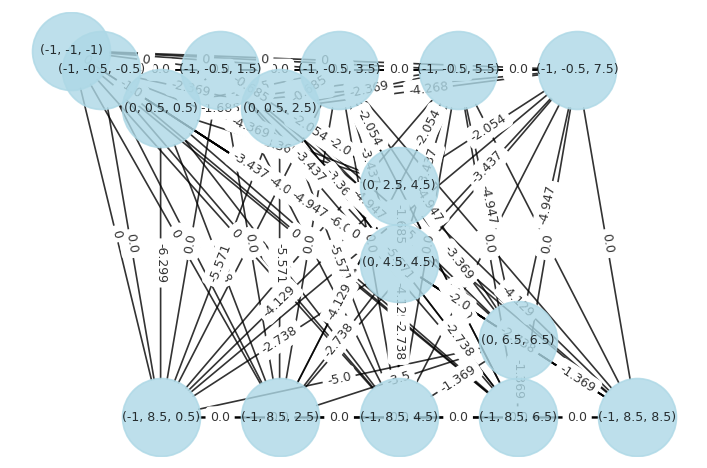

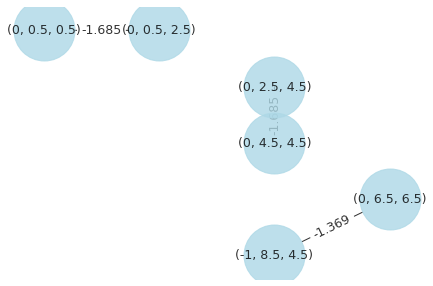

In [21]:
# with degeneracy weighting
decoder = RotatedDecoder({"d":9,"T":1})
p = 0.1 # p/(1-p) > 16

all_syndromes = {"X": [], "Z": [(0,0.5,0.5),(0,0.5,2.5), (0,2.5,4.5), (0,4.5,4.5), (0,6.5,6.5)]}
matches = {}

for syndrome_key, syndromes in all_syndromes.items():
    print(f"{syndrome_key} Syndrome Graph to correct {syndrome_key} Flips")
    error_graph = decoder._make_error_graph(syndromes,syndrome_key, err_prob=p)
    print("Error Graph")
    decoder.draw(error_graph)
    matches[syndrome_key] = decoder._run_mwpm(error_graph, floats=True)
    matched_graph = decoder._run_mwpm_graph(error_graph, floats=True)
    print("Matched Graph")
    decoder.draw(matched_graph)
    print(f"Matches: {matches[syndrome_key]}")
    print("\n===\n")

X Syndrome Graph to correct X Flips
Error Graph
Matched Graph
Matches: []

===

Z Syndrome Graph to correct Z Flips
Error Graph
Matched Graph
Matches: [((0, 0.5, 2.5), (0, 2.5, 4.5)), ((0, 4.5, 4.5), (0, 6.5, 6.5)), ((0, 0.5, 0.5), (-1, -0.5, -0.5))]

===



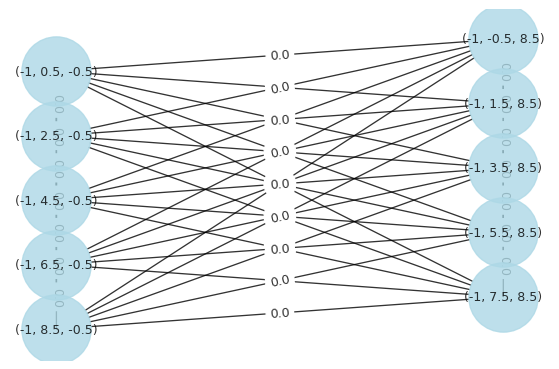

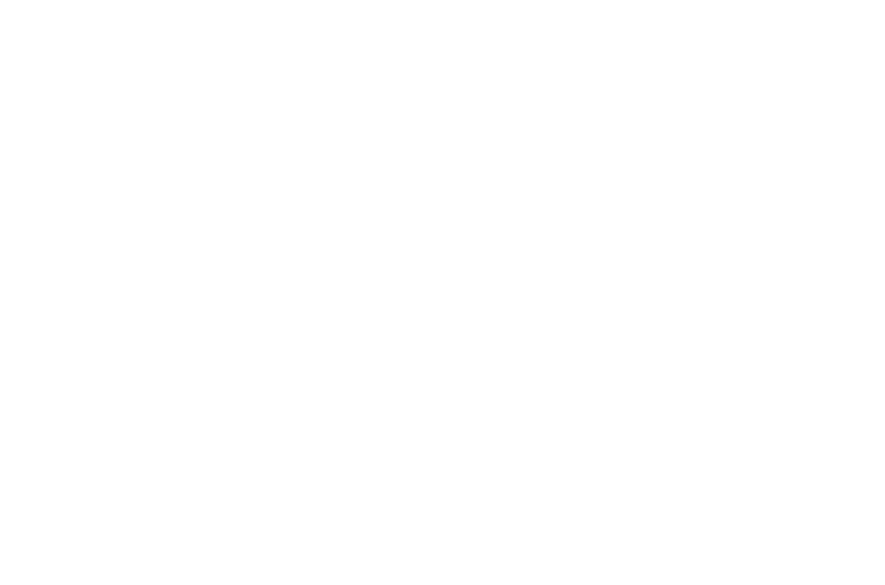

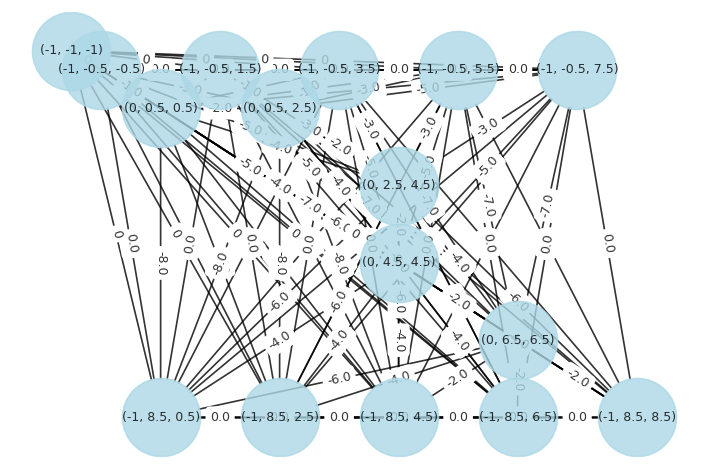

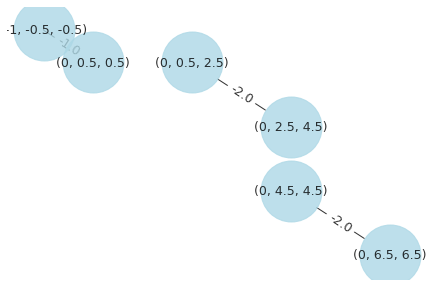

In [22]:
# with degeneracy weighting
decoder = RotatedDecoder({"d":9,"T":1})
p = None

all_syndromes = {"X": [], "Z": [(0,0.5,0.5),(0,0.5,2.5), (0,2.5,4.5), (0,4.5,4.5), (0,6.5,6.5)]}
matches = {}

for syndrome_key, syndromes in all_syndromes.items():
    print(f"{syndrome_key} Syndrome Graph to correct {syndrome_key} Flips")
    error_graph = decoder._make_error_graph(syndromes,syndrome_key, err_prob=p)
    print("Error Graph")
    decoder.draw(error_graph)
    matches[syndrome_key] = decoder._run_mwpm(error_graph)
    matched_graph = decoder._run_mwpm_graph(error_graph)
    print("Matched Graph")
    decoder.draw(matched_graph)
    print(f"Matches: {matches[syndrome_key]}")
    print("\n===\n")

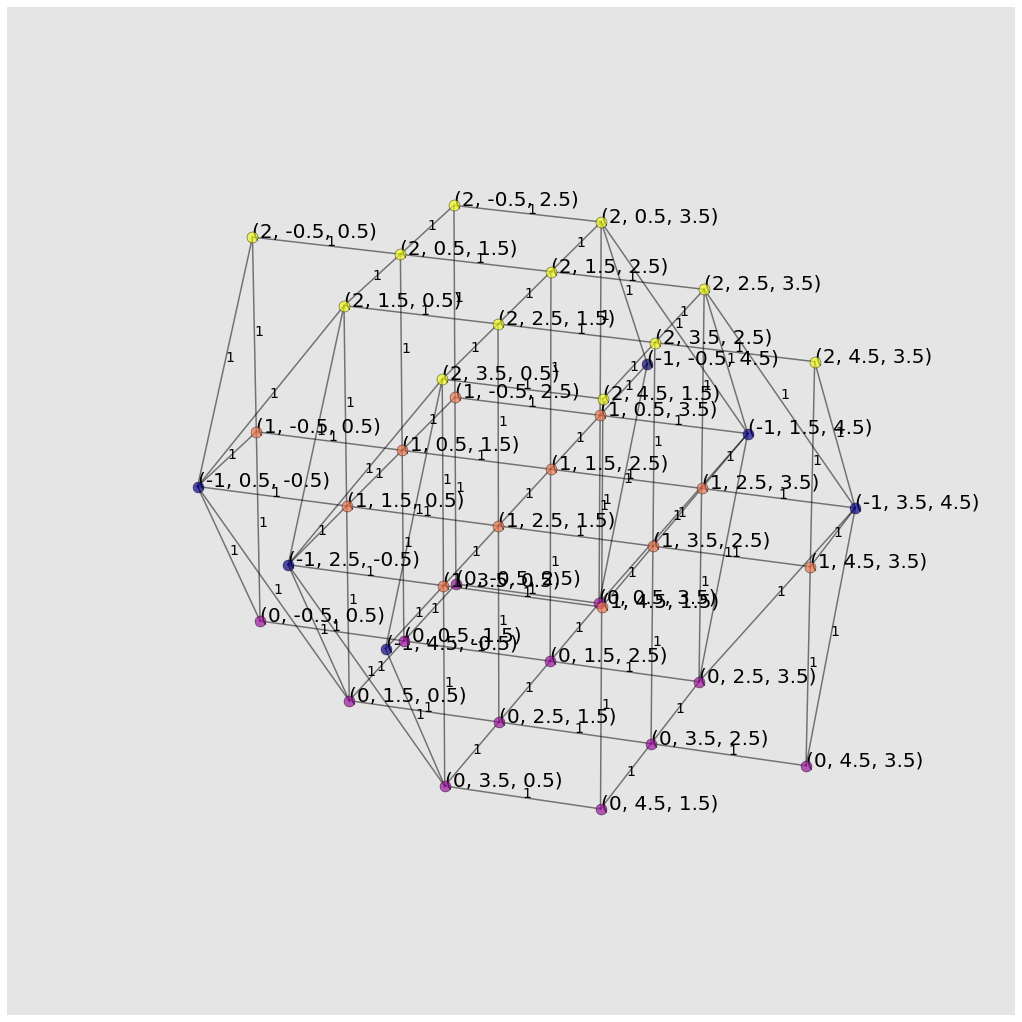

In [23]:
decoder = RotatedDecoder({"d":5,"T":3})
G = decoder.S['X']
decoder.draw(G)

X Syndrome Graph to correct X Flips
Error Graph


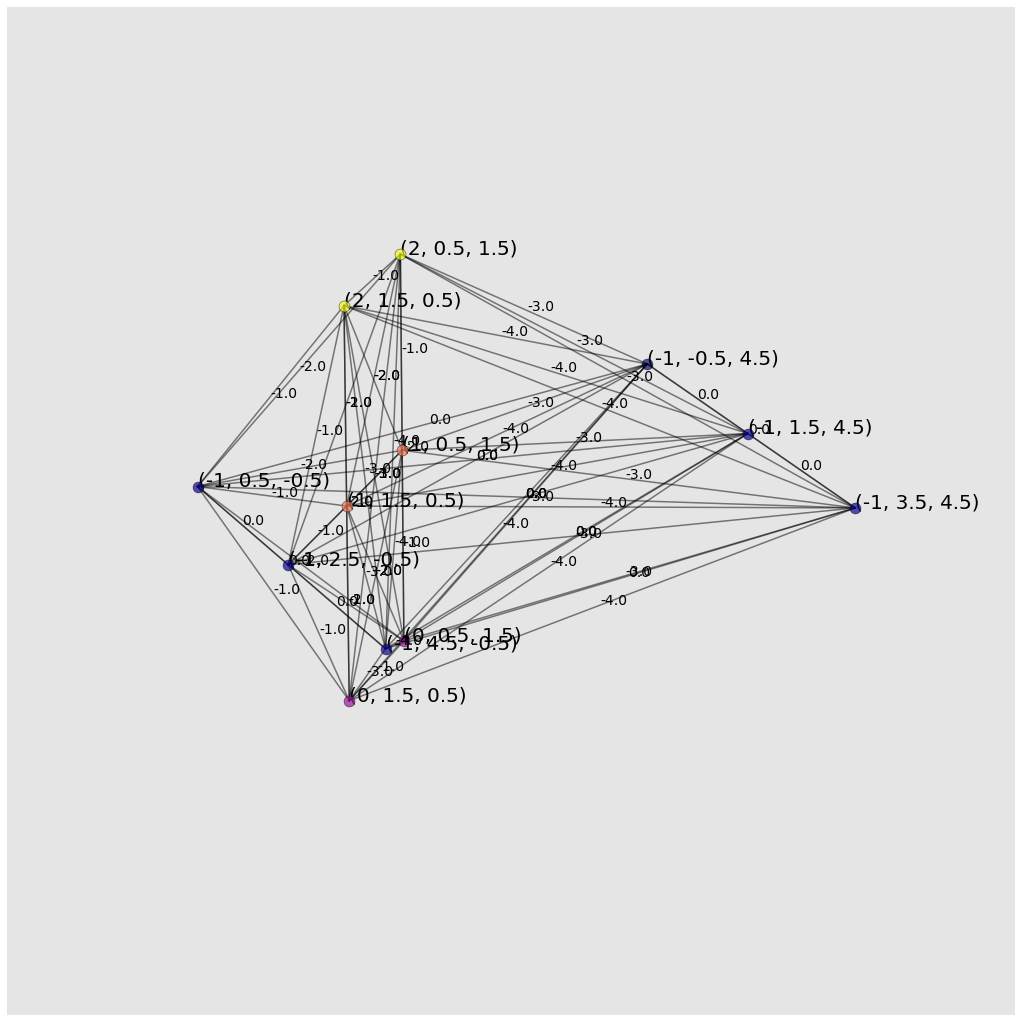

Matched Graph


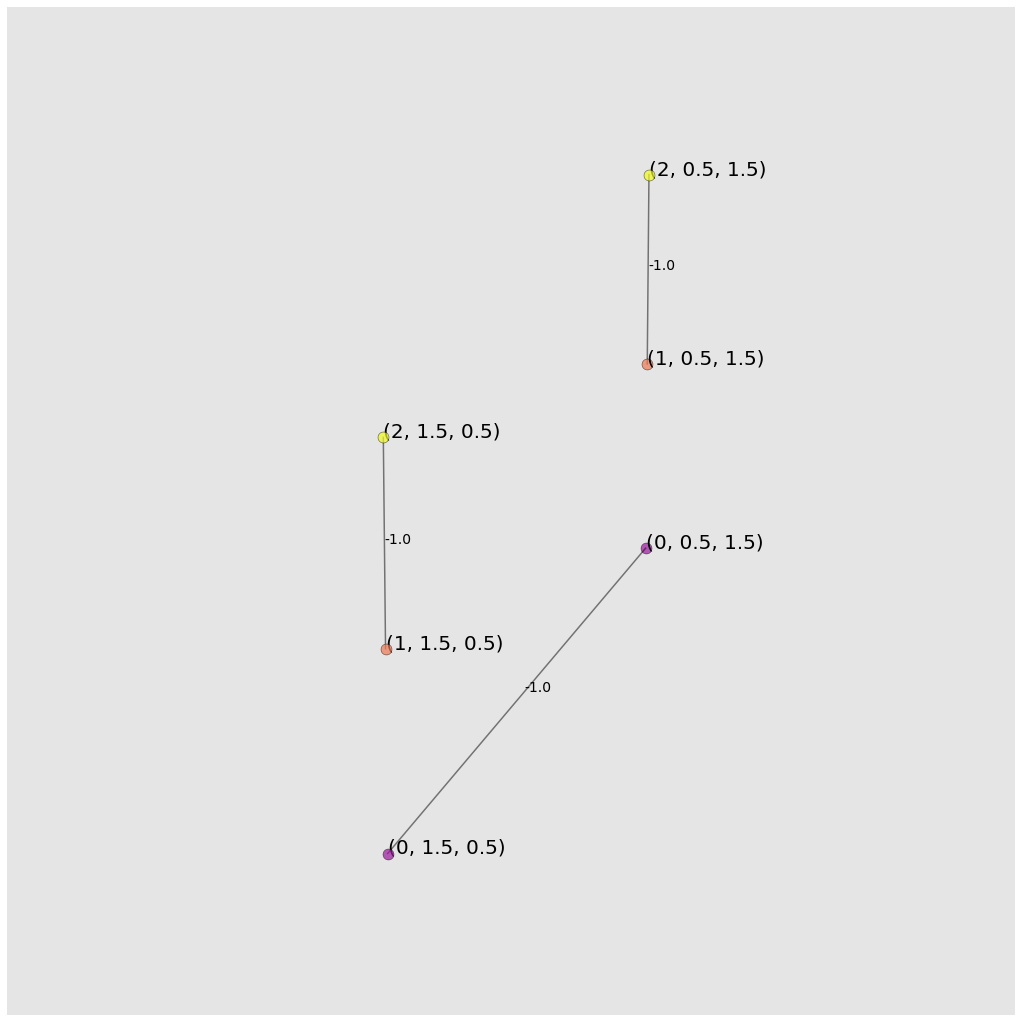

Matches: [((0, 1.5, 0.5), (0, 0.5, 1.5)), ((2, 1.5, 0.5), (1, 1.5, 0.5)), ((2, 0.5, 1.5), (1, 0.5, 1.5))]

===

Z Syndrome Graph to correct Z Flips
Error Graph


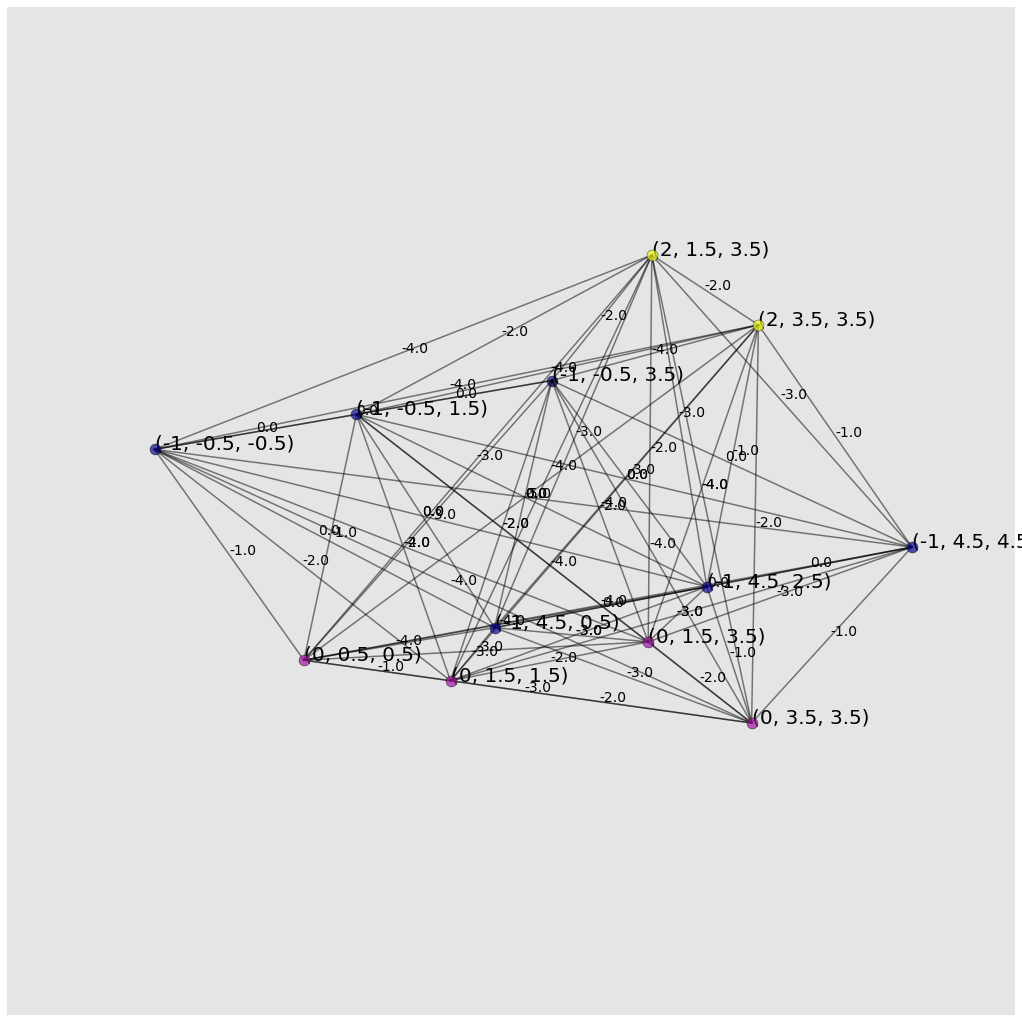

Matched Graph


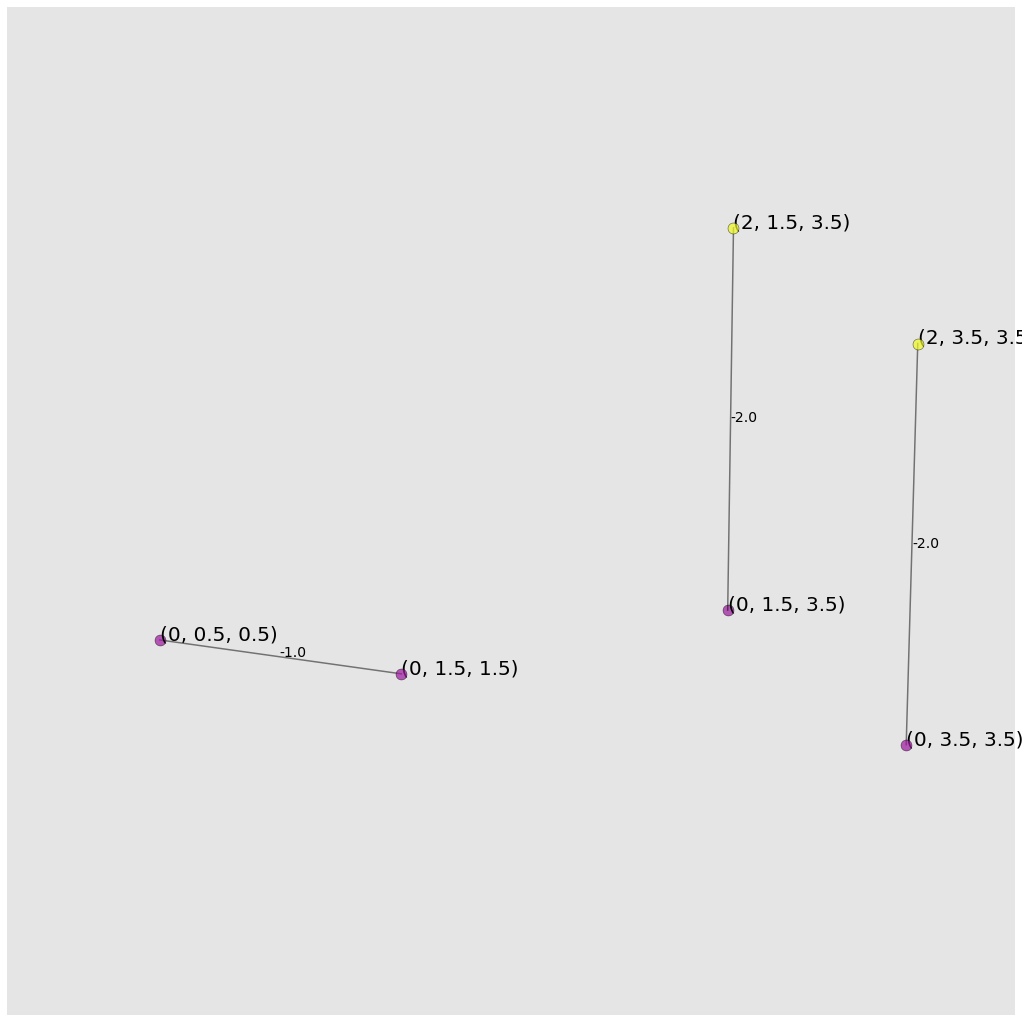

Matches: [((0, 0.5, 0.5), (0, 1.5, 1.5)), ((0, 1.5, 3.5), (2, 1.5, 3.5)), ((2, 3.5, 3.5), (0, 3.5, 3.5))]

===



In [24]:
p = None
all_syndromes = {"X": [(0,1.5,.5),(0,.5,1.5),(1,1.5,.5),(1,.5,1.5),(2,1.5,.5),(2,.5,1.5)], 
                 "Z": [(0,0.5,0.5),(0,1.5,1.5),(0,1.5,3.5), (0,3.5,3.5),(2,1.5,3.5), (2,3.5,3.5)]}
matches = {}

for syndrome_key, syndromes in all_syndromes.items():
    print(f"{syndrome_key} Syndrome Graph to correct {syndrome_key} Flips")
    error_graph = decoder._make_error_graph(syndromes,syndrome_key, err_prob=p)
    print("Error Graph")
    decoder.draw(error_graph)
    matches[syndrome_key] = decoder._run_mwpm(error_graph)
    matched_graph = decoder._run_mwpm_graph(error_graph)
    print("Matched Graph")
    decoder.draw(matched_graph)
    print(f"Matches: {matches[syndrome_key]}")
    print("\n===\n")

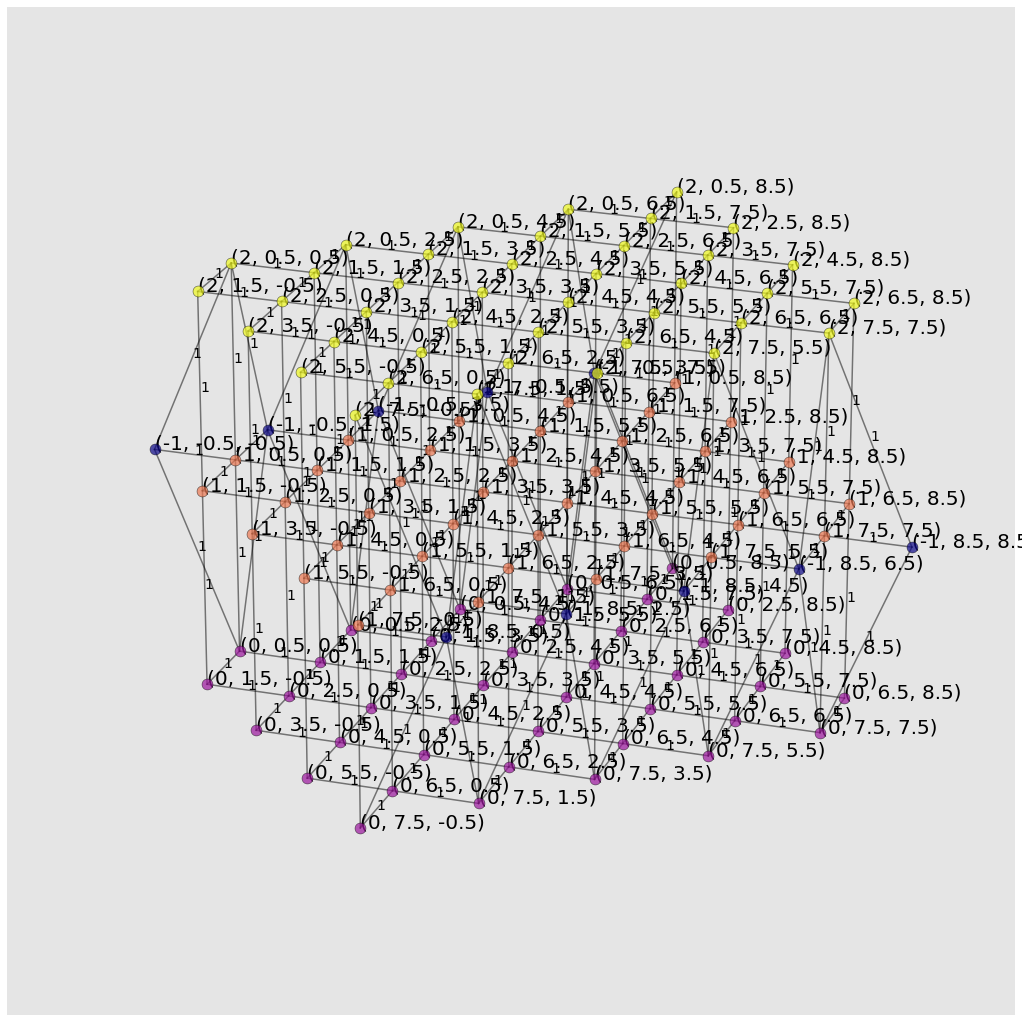

In [25]:
decoder = RotatedDecoder({"d":9,"T":3})
G = decoder.S['Z']
decoder.draw(G)

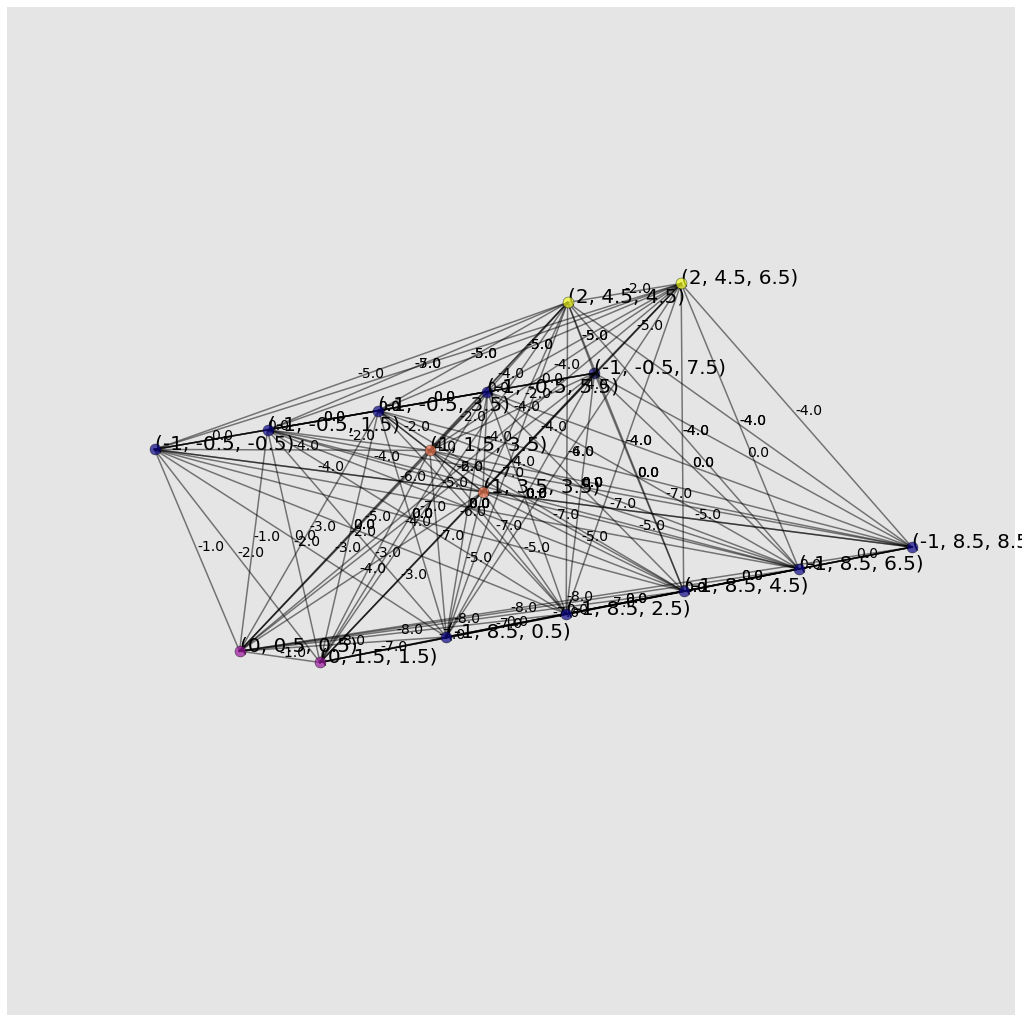

In [26]:
node_set = [(0,0.5,0.5),(0,1.5,1.5),(1,1.5,3.5),(1,3.5,3.5),(2,4.5,4.5),(2,4.5,6.5)]
error_graph = decoder._make_error_graph(node_set,'Z')
decoder.draw(error_graph)

In [27]:
g = decoder._run_mwpm(error_graph)
for e in g:
    print(e)

((2, 4.5, 6.5), (2, 4.5, 4.5))
((0, 1.5, 1.5), (0, 0.5, 0.5))
((1, 3.5, 3.5), (1, 1.5, 3.5))


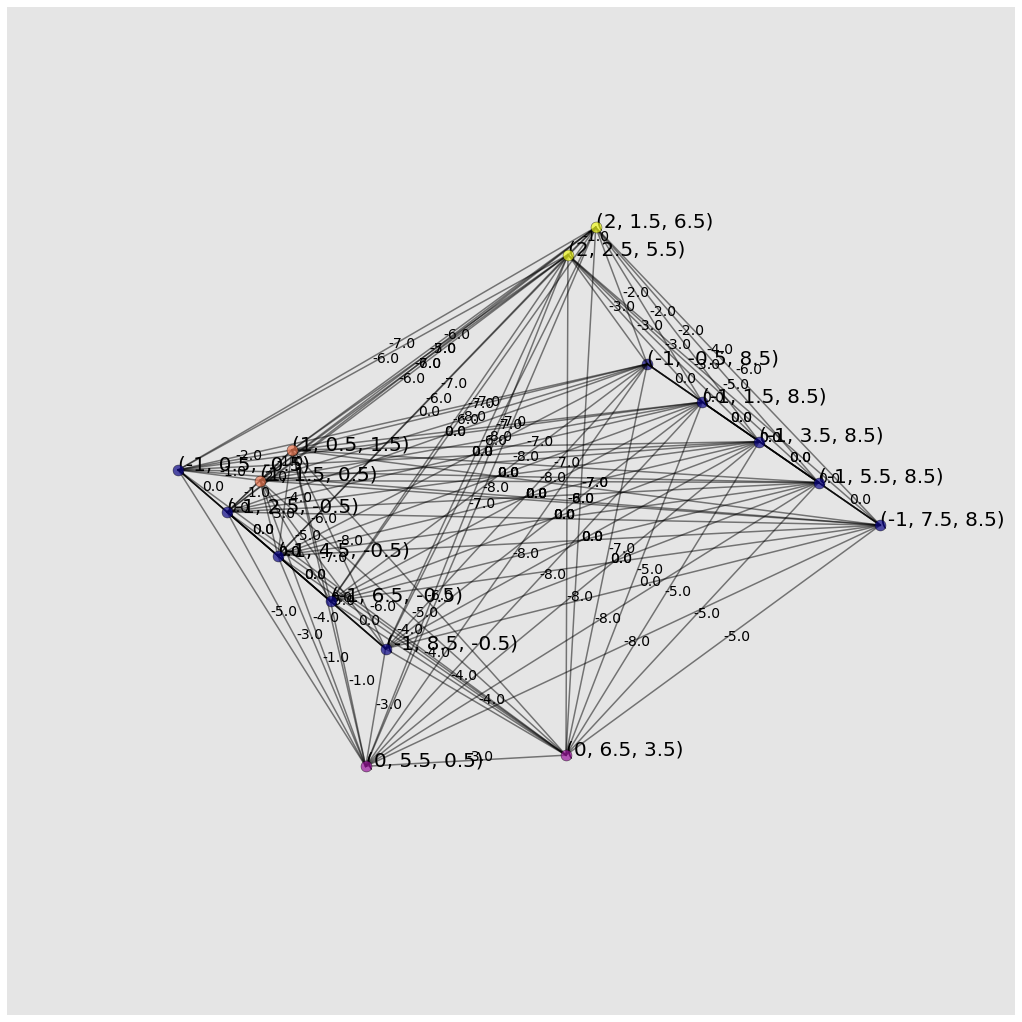

In [29]:
node_set = [(1,1.5,0.5),(1,0.5,1.5),(2,1.5,6.5),(2,2.5,5.5),(0,5.5,.5),(0,6.5,3.5)]
error_graph = decoder._make_error_graph(node_set,'X')
decoder.draw(error_graph)

In [30]:
g = decoder._run_mwpm(error_graph)
for e in g:
    print(e)

((1, 1.5, 0.5), (1, 0.5, 1.5))
((2, 1.5, 6.5), (2, 2.5, 5.5))
((0, 5.5, 0.5), (0, 6.5, 3.5))


Matched Graph


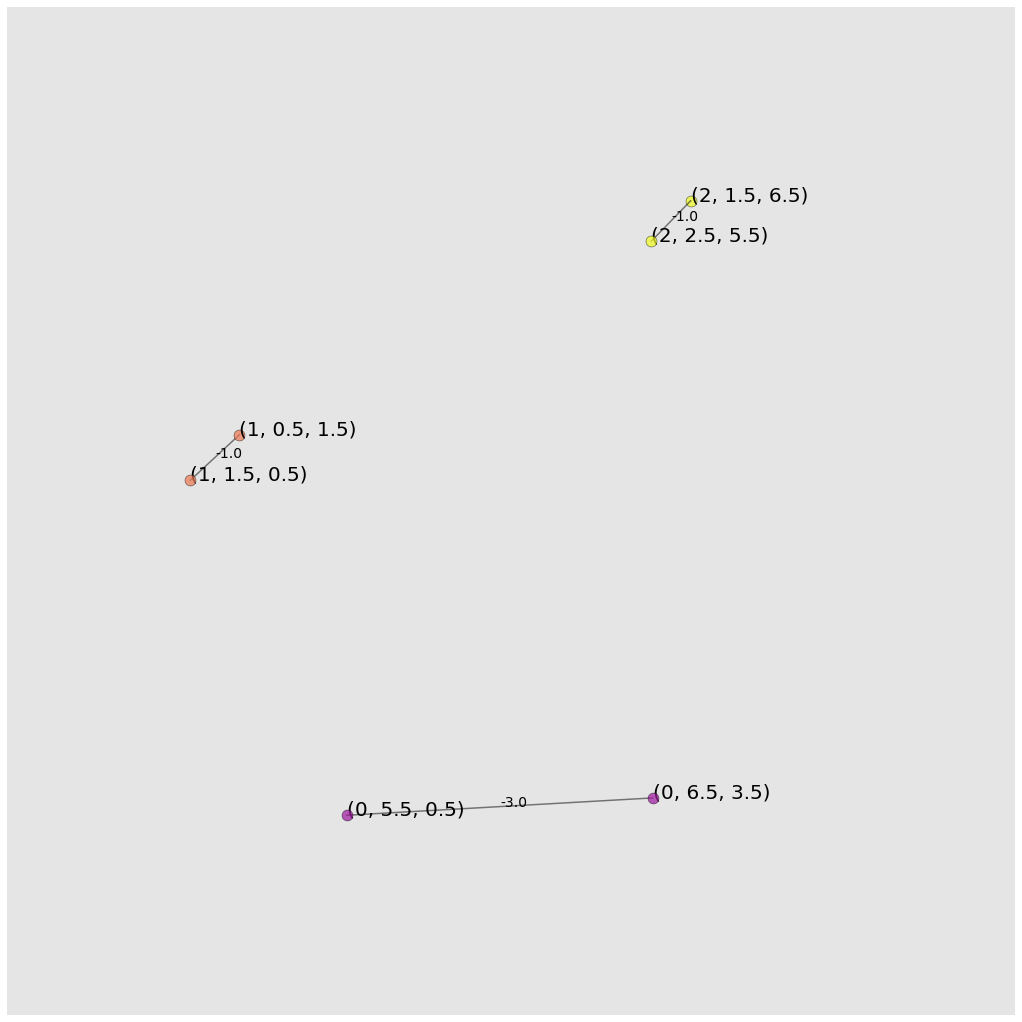

In [31]:
matches = decoder._run_mwpm(error_graph)
matched_graph = decoder._run_mwpm_graph(error_graph)
print("Matched Graph")
decoder.draw(matched_graph)

(<Figure size 1138.42x758.947 with 1 Axes>, <AxesSubplot:>)

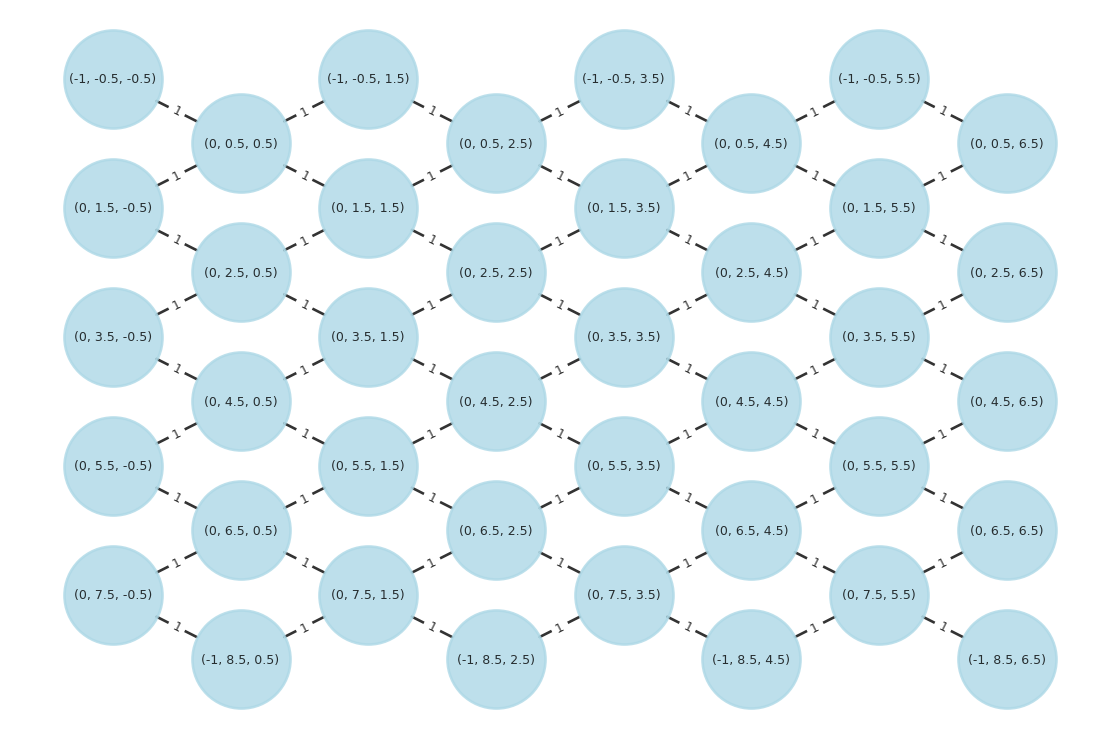

In [32]:
decoder = RotatedDecoder({"d":(9,7),"T":1})
G = decoder.S['Z']
decoder.draw(G)

(<Figure size 1138.42x758.947 with 1 Axes>, <AxesSubplot:>)

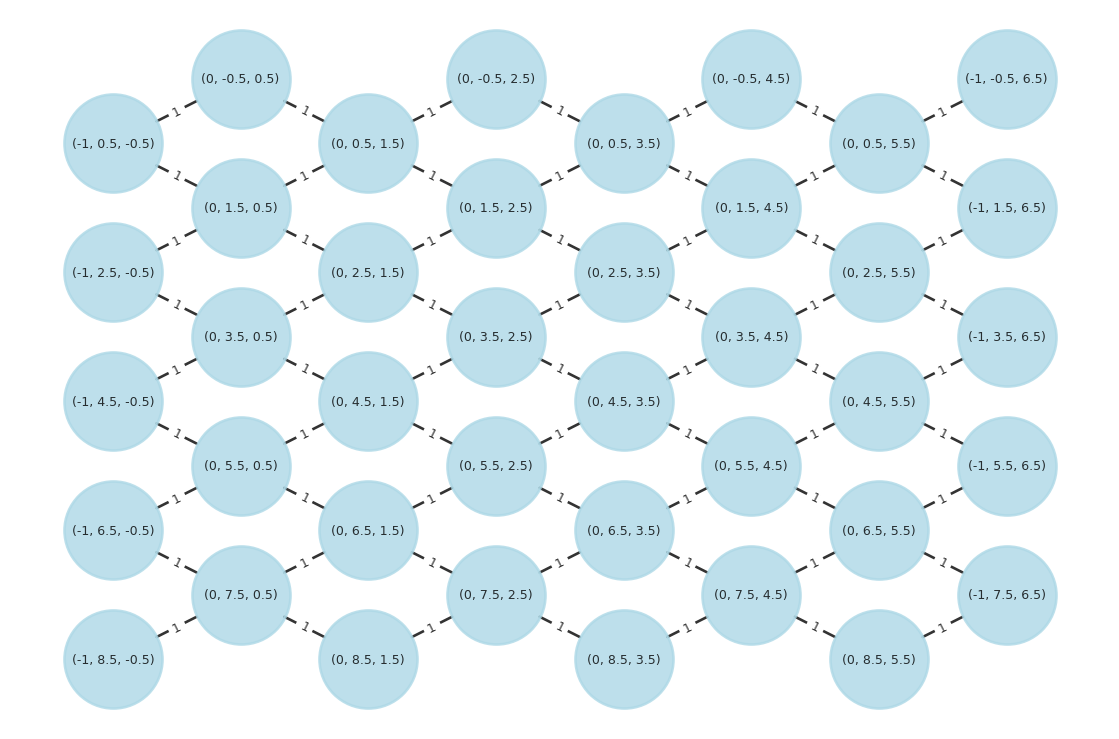

In [33]:
G = decoder.S['X']
decoder.draw(G)

X Syndrome Graph to correct X Flips
Error Graph
Matched Graph
Matches: []

===

Z Syndrome Graph to correct Z Flips
Error Graph
Matched Graph
Matches: [((0, 2.5, 4.5), (0, 0.5, 2.5)), ((0, 6.5, 6.5), (0, 4.5, 4.5)), ((-1, -0.5, -0.5), (0, 0.5, 0.5))]

===



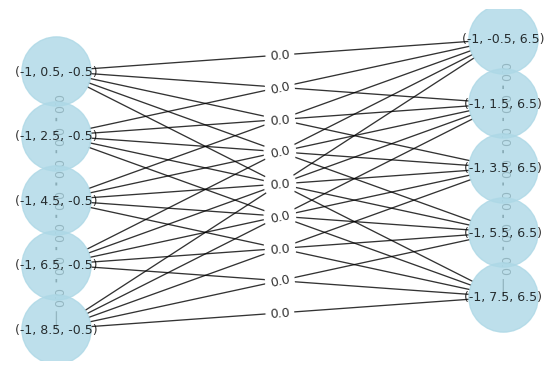

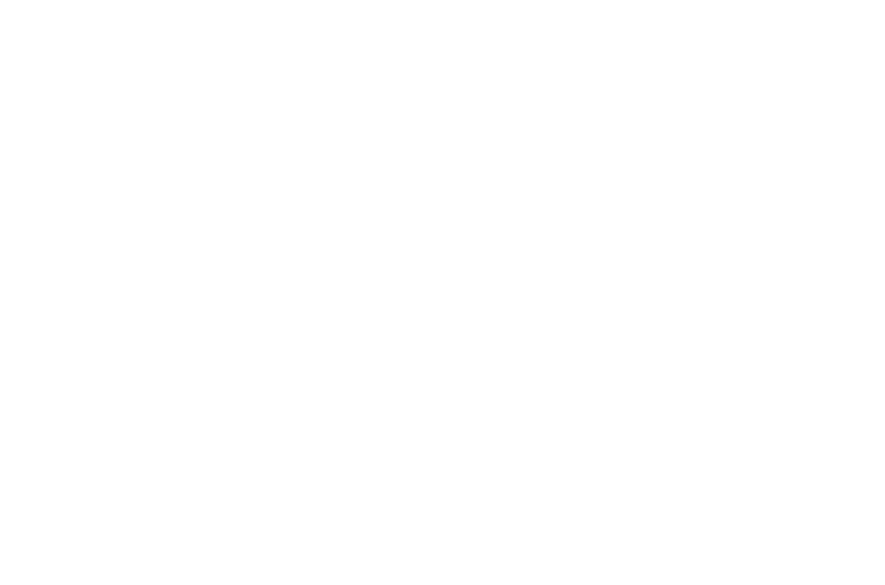

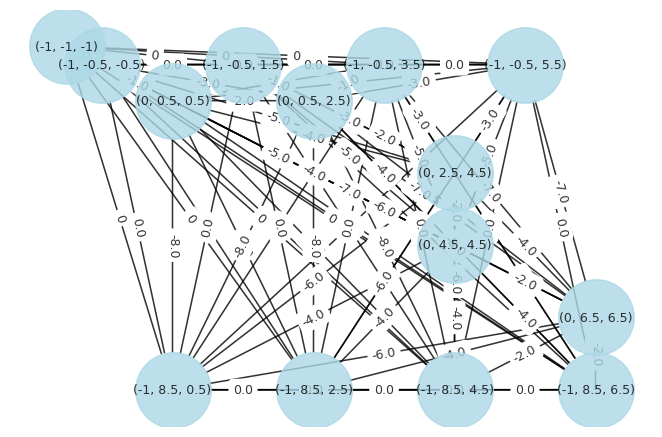

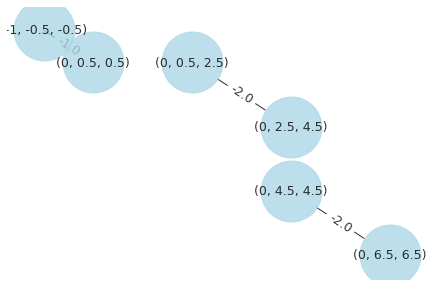

In [34]:
# with degeneracy weighting
decoder = RotatedDecoder({"d":(9,7),"T":1})
p = None

all_syndromes = {"X": [], "Z": [(0,0.5,0.5),(0,0.5,2.5), (0,2.5,4.5), (0,4.5,4.5), (0,6.5,6.5)]}
matches = {}

for syndrome_key, syndromes in all_syndromes.items():
    print(f"{syndrome_key} Syndrome Graph to correct {syndrome_key} Flips")
    error_graph = decoder._make_error_graph(syndromes,syndrome_key, err_prob=p)
    print("Error Graph")
    decoder.draw(error_graph)
    matches[syndrome_key] = decoder._run_mwpm(error_graph)
    matched_graph = decoder._run_mwpm_graph(error_graph)
    print("Matched Graph")
    decoder.draw(matched_graph)
    print(f"Matches: {matches[syndrome_key]}")
    print("\n===\n")